<a href="https://colab.research.google.com/github/AndreCauper/fraude-de-cartao-de-credito/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito


Fraudes de cartão de crédito são crimes em que informações de cartões de crédito são utilizadas sem a devida autorização do proprietário para realizar transações fraudulentas. Essas transações muitas vezes envolvem compras não autorizadas, transferências de fundos ou outros tipos de atividades financeiras fraudulentas.

Os fraudadores podem obter informações do cartão de crédito de várias maneiras, incluindo:

**Skimming**: Instalação de dispositivos em caixas eletrônicos ou terminais de pagamento para capturar as informações do cartão de crédito.

**Phishing**: Enganar as pessoas por meio de e-mails, mensagens ou sites falsos para obter suas informações pessoais e de cartão de crédito.

**Roubo físico**: O roubo direto de carteiras, bolsas ou outros itens que contenham cartões de crédito.

**Ataques cibernéticos**: Hackers podem comprometer sistemas de empresas ou instituições financeiras para obter informações de cartões de crédito.

**Malware**: Uso de software malicioso para capturar informações de cartões de crédito de computadores ou dispositivos infectados.

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<br>
<p align=center>
<img src=https://img.freepik.com/vetores-gratis/jovem-hacker-anonimo-com-design-plano_23-2147885243.jpg?w=826&t=st=1707061725~exp=1707062325~hmac=e2163e5f064241856391f023dc6825aa738c65141fed756a662d2b170dbd6a10 width="50%"></p>

<br>

## Impacto das fraudes

De acordo com um estudo da Nilson Report, em 2021, o prejuízo com ações fraudulentas sofrido por emissores de cartões, estabelecimentos comerciais, adquirentes comerciais e emissores de transações em caixas eletrônicos de todo o mundo chegou a **USD** **28,58 bilhões**

<br>

<p align=center>
<img src=https://img.freepik.com/vetores-gratis/seta-vermelha-apontando-para-baixo-mostrando-crise_1394-769.jpg?size=626&ext=jpg&ga=GA1.1.1124923478.1704984290&semt=sph width="50%"></p>

<br>


Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

<br>
<p align=center>
<img src=https://img.freepik.com/fotos-gratis/empresario-exausto-segurando-a-cabeca-com-dor-enquanto-trabalhava-no-pc-desktop-no-escritorio_637285-6527.jpg?size=626&ext=jpg&ga=GA1.1.1124923478.1704984290&semt=sph width="50%"></p>

<br>

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [4]:
#instalando o scikit-plot
pip install scikit-plot

In [5]:
#importar pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

Os conjunto de dados utilizado para esta análise foi baixado no link https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud. O nome do arquivo é creditcard.csv.

In [35]:
#importando dataset dataset
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

In [36]:
# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df = df.drop(test.index)

# verificando o conjunto
print("Dimensões do Conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino: ", df.shape)

Dimensões do Conjunto de Teste:  (42721, 31)
Dimensões do Conjunto de Treino:  (242086, 31)


## Situação dos dados e contextualização
Antes de iniciar uma Análise exploratória, precisamos conhecer um pouco dos dados que vamos trabalhar

In [11]:
#ver as 5 primeiras entradas do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
#ver o tamanho do dataset
print('quantidade de registros do dataset : ',df.shape[0])
print('número de variáveis do dataset: ', df.shape[1])

quantidade de registros do dataset :  242086
número de variáveis do dataset:  31


In [13]:
#verificar dados nulos
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

O dataset não possui valores nulos para que sejam trabalhados estatísticamente

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242086 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    242086 non-null  float64
 1   V1      242086 non-null  float64
 2   V2      242086 non-null  float64
 3   V3      242086 non-null  float64
 4   V4      242086 non-null  float64
 5   V5      242086 non-null  float64
 6   V6      242086 non-null  float64
 7   V7      242086 non-null  float64
 8   V8      242086 non-null  float64
 9   V9      242086 non-null  float64
 10  V10     242086 non-null  float64
 11  V11     242086 non-null  float64
 12  V12     242086 non-null  float64
 13  V13     242086 non-null  float64
 14  V14     242086 non-null  float64
 15  V15     242086 non-null  float64
 16  V16     242086 non-null  float64
 17  V17     242086 non-null  float64
 18  V18     242086 non-null  float64
 19  V19     242086 non-null  float64
 20  V20     242086 non-null  float64
 21  V21     24

###panorama do dataset
Podemos observar que o dataset importado do arquivo *creditcard.csv* possui muitos dados, mas não trazem muita informação inteligível. algumas observações sobre o dataset:


1.   o Dataset possui apenas campos do tipo numérico.
2.   De todas as 31 variáveis, apenas 3 não foram descaracterizadas (conforme abordado no início).
3.   Apenas 3 variáveis do dataset não estão normalizados pelo PCA.
4.   Conforme explicado pelo fornecedor dos dados, a variável *Class* possui valor igual a 0 para transações normais e valor igual a 1 para transações fraudulentas. Portanto, *Class* é o nosso vetor alvo e para isso utilizaremos métodos de aprendizado supervisionado


## Análise exploratória
Vamos começar com um resumo estatístico do dataset

In [15]:
#resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000



* Ao plotar o resume estatístico, podemos notar que existem valores bem discrepantes no dataset mas que não podemos ter uma breve idéia da informação que se trata. Porém temos a coluna 'Amount' que trata dos valores em uma transação e que 75% das transações são de 79.7 e o máximo é de 19656.53 akém também que o desvio padrão é de 251.27

In [16]:
#tamanho do dataset
print('dataset: ', df.shape[0])
print('quantidade de variaveis : ', df.shape[1])

dataset:  242086
quantidade de variaveis :  31


### precisamos ver a quantidade de transações que foram normais e foram fraudes para continuar explorando o dataset

In [17]:
#transação normal
total_transacao = df[df['Class']==0].shape[0]

#total de fraudes
total_fraudes = df[df['Class']==1].shape[0]


print('transações normais ', total_transacao)
print('transações fraudulentaas', total_fraudes)
print('porcentagem de transações fraudulentas: ',total_fraudes/df.shape[0]*100)

transações normais  241668
transações fraudulentaas 418
porcentagem de transações fraudulentas:  0.17266591211387688


Podemos ver que a quantidade de transação fraudulenta é muito baixa(0.17% do total), mas que trazem grandes transtornos para o cliente e seus bancos. Vamos plotar um gráfico de barras para  vermos graficamente essa desproporção de transação normal e fraude.

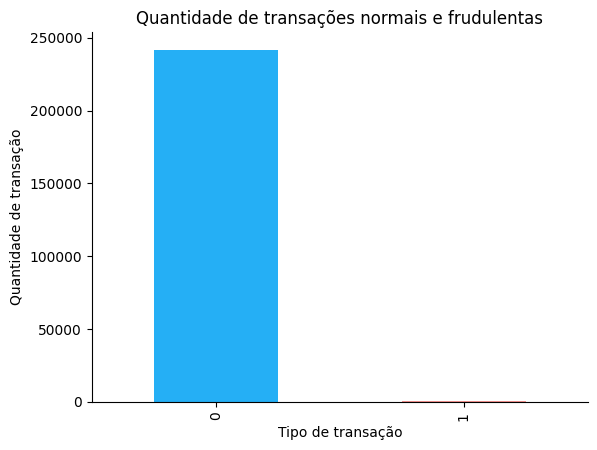

In [18]:
#plotar grafico de barras da variavel Class
fig, ax = plt.subplots()

labels=['0 = normal','1 = fraude']

df['Class'].value_counts().plot(kind='bar',ax=ax, color=['#25AFF5','#F4938E'])
ax.set_title('Quantidade de transações normais e frudulentas')
ax.set_xlabel('Tipo de transação')
ax.set_ylabel('Quantidade de transação')

#remover spines da direita e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


Vamos plotar gráficos para comparar a distribuição da variável Class ao longo do tempo

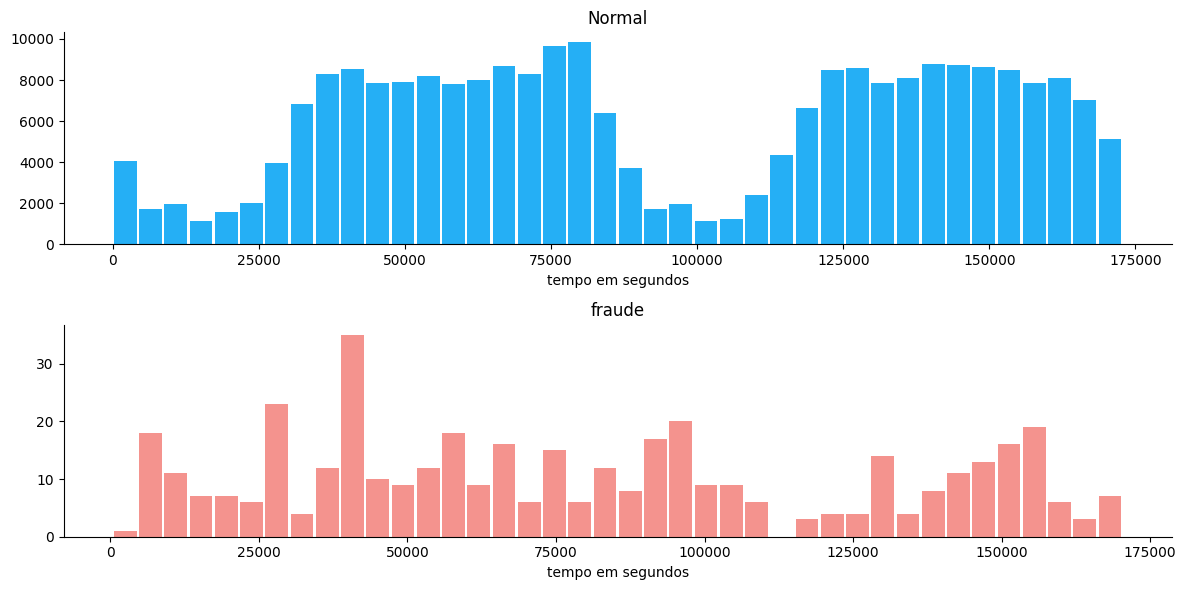

In [19]:
#plotar grafico de barras
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

#transações normal em relação ao tempo
ax0.hist(df.Time[df['Class']==0], rwidth=0.9, bins=40, color='#25AFF5')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.set_xlabel('tempo em segundos')
ax0.set_title('Normal')

#transações fraudulenta em relação ao tempo
ax1.hist(df.Time[df['Class']==1], rwidth=0.9, bins=40, color='#F4938E')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('tempo em segundos')
ax1.set_title('fraude')

plt.tight_layout()

vamos plotar boxplot para ver as diferenças no padrão de transação em relação a variável *Amount*

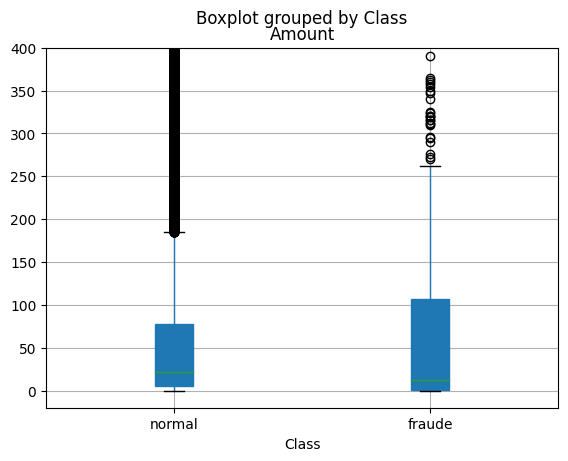

In [20]:
#plotando os boxplots
fig ,ax = plt.subplots(sharex=True)
bplot1 = df.boxplot(column='Amount', by='Class',ax=ax, patch_artist=True)
plt.ylim((-20,400))
plt.xticks([1, 2], ['normal', 'fraude'])


# preenchendo as cores dos boxplots



plt.show()

Vamos ver as informações estatísticas para Class igual 1

In [21]:
#informações estatatísticas
df[df['Class']==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0
mean,80228.753589,-4.848349,3.683744,-7.081774,4.527930,-3.261467,-1.368374,-5.624074,0.565332,-2.568979,...,0.776343,-0.015858,-0.028657,-0.100824,0.048802,0.055520,0.121826,0.088988,128.496722,1.0
std,47501.765659,7.042972,4.471003,7.259635,2.825995,5.565519,1.923645,7.411056,7.300644,2.547692,...,4.136866,1.590225,1.642930,0.516446,0.808219,0.478013,1.430297,0.530512,267.731154,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.255593,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.552593,0.000000,1.0
25%,41238.500000,-5.958320,1.177078,-8.813291,2.420618,-4.791154,-2.492665,-8.087539,-0.143781,-3.862578,...,0.112931,-0.572910,-0.342764,-0.424168,-0.327384,-0.256894,-0.026230,-0.104948,1.000000,1.0
50%,75294.500000,-2.319574,2.712195,-5.063706,4.211449,-1.561623,-1.401798,-2.995991,0.633338,-2.061335,...,0.596733,0.021118,-0.074621,-0.052055,0.098983,0.004321,0.391573,0.150454,11.855000,1.0
75%,124781.250000,-0.369966,5.063356,-2.228769,6.305725,0.201776,-0.386432,-0.936937,1.811327,-0.780941,...,1.320882,0.615344,0.302578,0.281496,0.454747,0.399143,0.795104,0.387926,106.812500,1.0
max,170348.000000,2.091900,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


Para comparar as distribuições de cada variável para cada classe, plotaremos um gráfico de densidade. Ele permite visualmente detectar anomalias e semelhanças das variáveis.


<ipython-input-22-516185512f8e>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
<ipython-input-22-516185512f8e>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
<ipython-input-22-516185512f8e>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
<ipython-input-22-516185512f8e>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_1[col], label="Class 1", shad

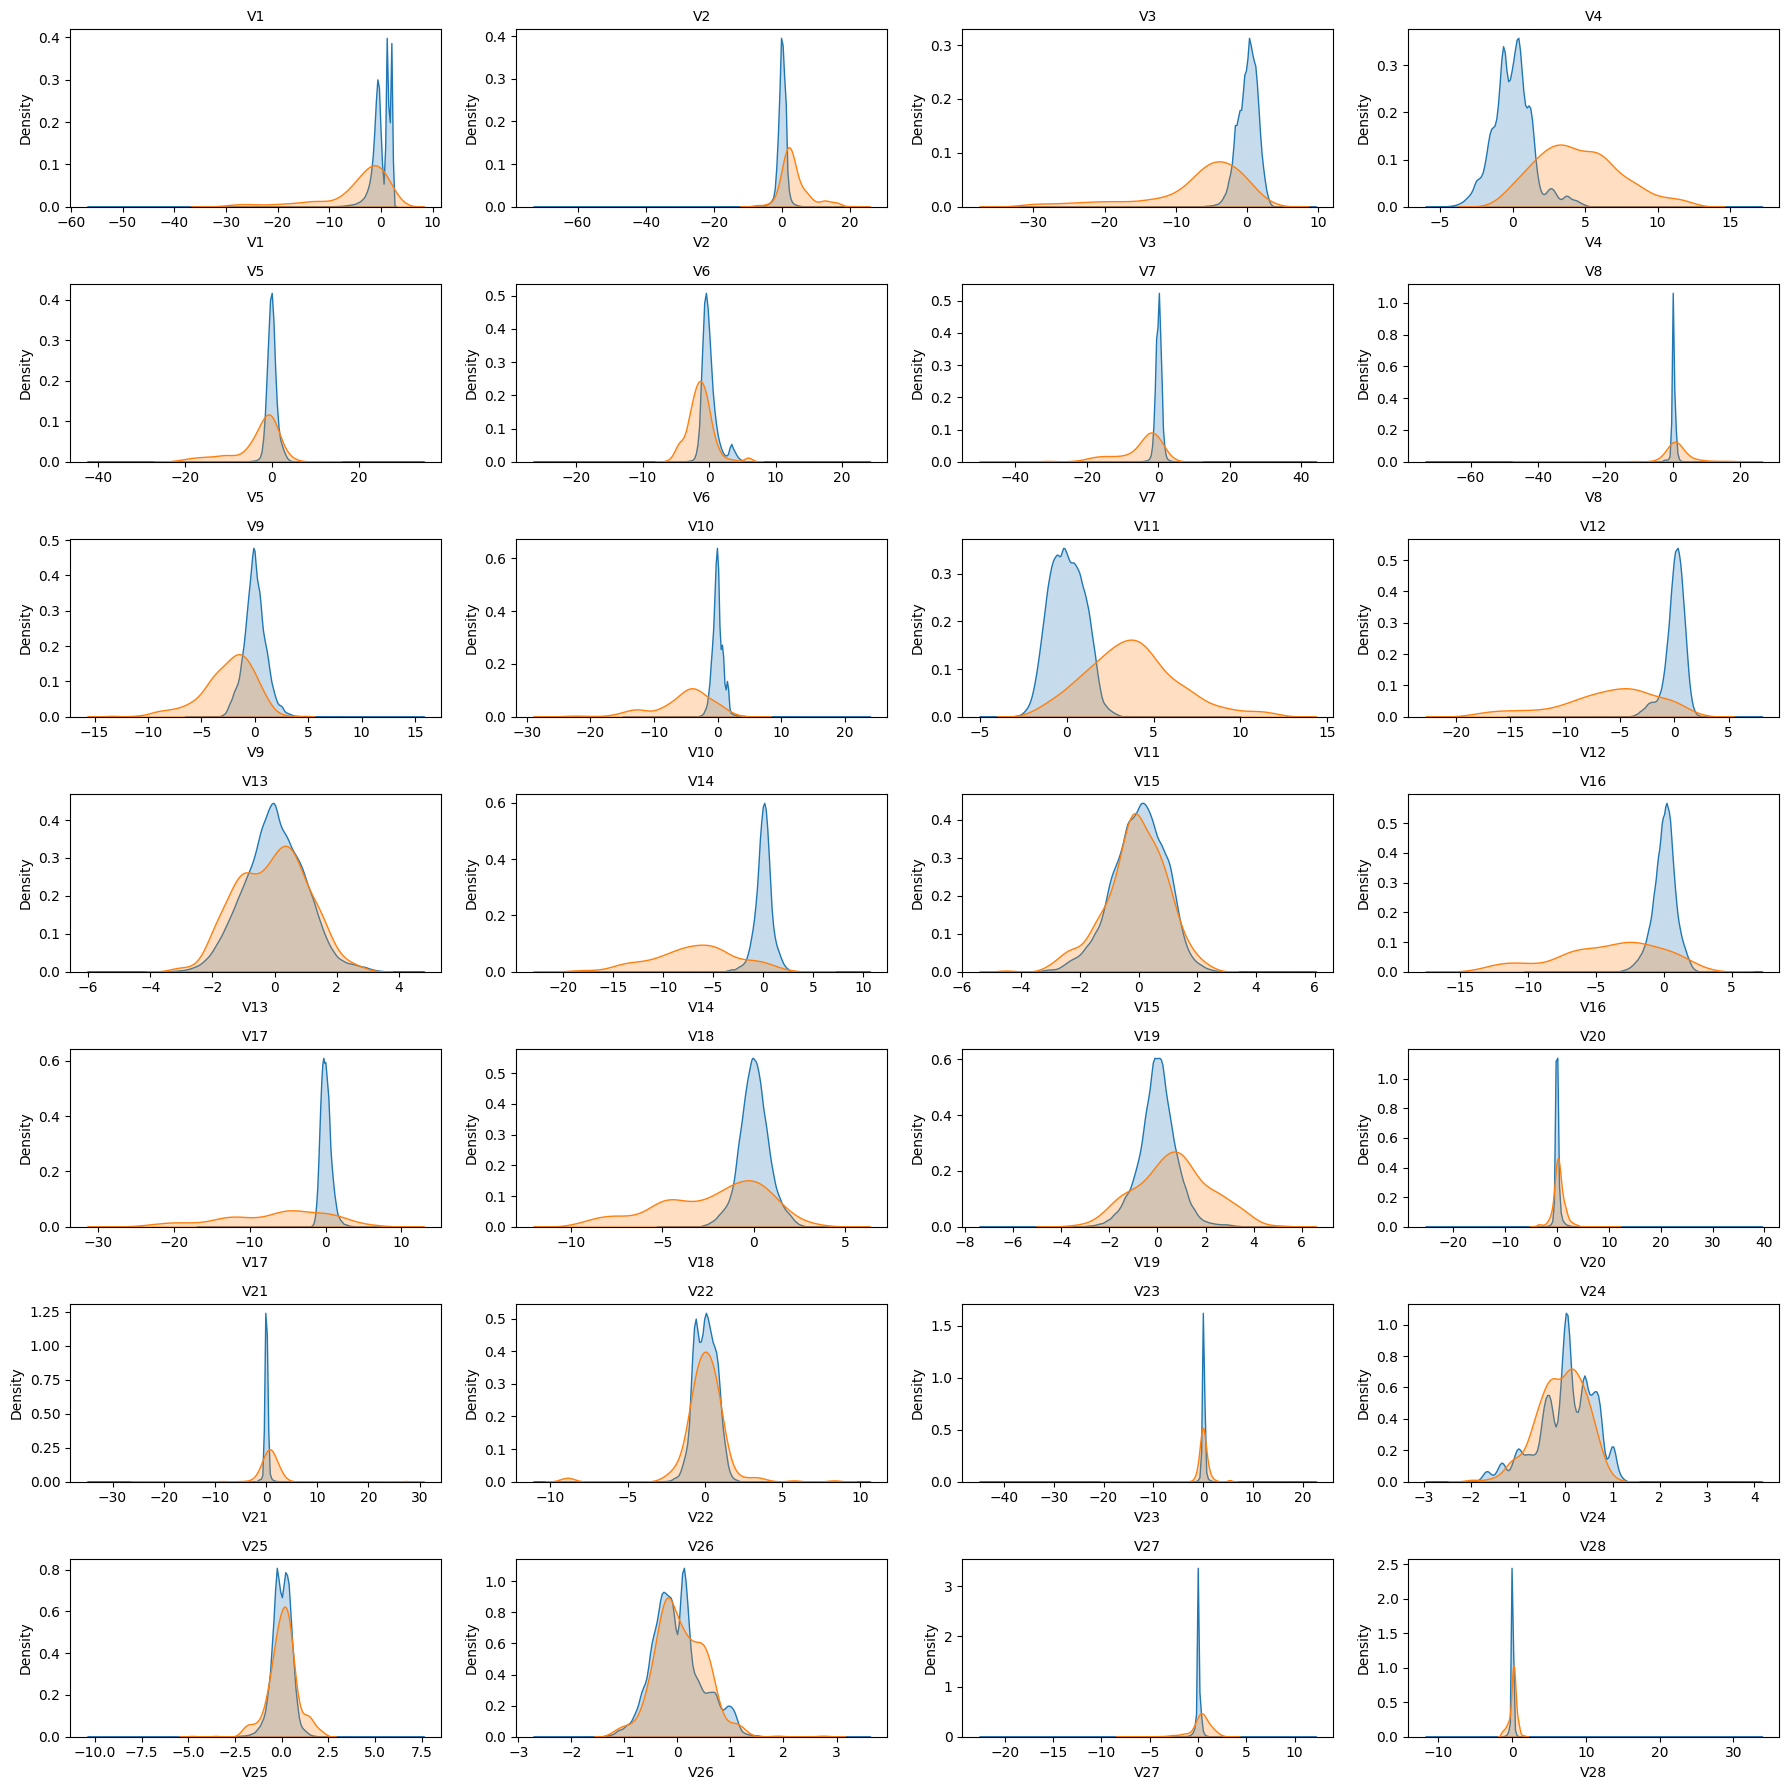

In [22]:
#gráfico de densidade
colunas = df.drop(['Class','Amount','Time'],axis=1).columns
num_plots = len(colunas)
df_class_0 = df[df.Class == 0 ]
df_class_1 = df[df.Class == 1 ]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))

fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in colunas:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

Até este  ponto, podemos extrair algumas observações
* As colunas *Time* e *Amout* não estão normalizadas
* não foi preciso tratar valores ausentes no dataframe
* A Análise Fatorial por Componentes Principais (PCA) configura-se em técnica exploratória que lida com variáveis *MÉTRICAS*.  Podemos dizer que esta técnica serve para REDUZIR A DIMENSIONALIDADE da base de dados
* Os dados estão desbalanceados devido a pequena incidência(transações fraudes) de uma categoria dentro do dataset em comparação com as demais(transações normais).

##Preparação dos dados
Para que os dados possam ser trabalhados de forma eficiente com Regressão Logistica, iremos construir etapas de preparação
* Normalizar as variáveis *Time* e *Amount*, que estão fora de normalização
* Dividir dados em teste e treino
* Balancear os dados para evitar baixar performance

### **Normalizar** *Time* e *Amount*

In [23]:
#normalizar colunas time e Amount
df_clean= df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time','Amount'],axis=1, inplace=True)

#ver as primeiras entradas do dataset normalizado
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


### **Dividir dados em teste e treino**
Antes de procedor com o balanceamento dos dados, precisamos separar os dados em teste e treino.

Para garantir que as classes tenham a mesma quantidade de classes proporcionalmente, utilizamos *stratify=True*.em tarefas de classificação onde você tem dados desbalanceados, ou seja, uma classe é muito mais prevalente do que outra, a divisão aleatória padrão pode resultar em conjuntos de treinamento e teste que não refletem adequadamente essa desigualdade

In [24]:
#separar variáveis em matriz de features e vetor alvo
X = df_clean.drop('Class', axis=1)
y= df_clean['Class']

#dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train,y_test = train_test_split(X,y, stratify=y, shuffle=True)

### **Balanceamento dos dados**

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar *Under-sampling*, preservando a classe minoritária.

0    313
1    313
Name: Class, dtype: int64


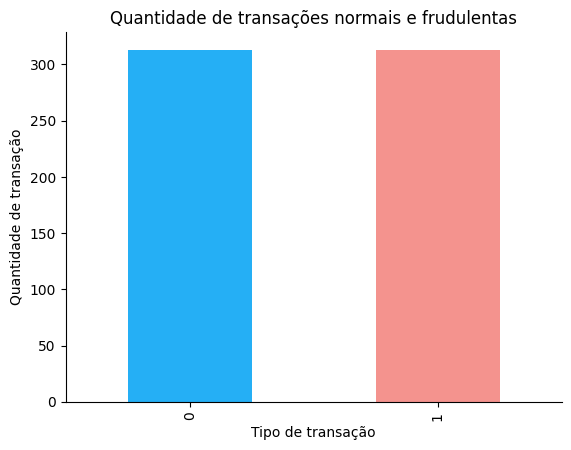

In [25]:
# usar under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

#ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

#plotar a nova distribuição
fig, ax5 = plt.subplots()

labels=['0 = normal','1 = fraude']

y_rus.value_counts().plot(kind='bar',ax=ax5, color=['#25AFF5','#F4938E'])
ax5.set_title('Quantidade de transações normais e frudulentas')
ax5.set_xlabel('Tipo de transação')
ax5.set_ylabel('Quantidade de transação')

#remover spines da direita e superior
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)


Vamos ver a matriz de correlação para identificar as variáveis que possuem grande relação com as outras. Vamos plotar duas matrizes de correlação para ver a diferença entre o dataframe não normalizado e o dataframe todo normalizado e as informações que eles nos mostram

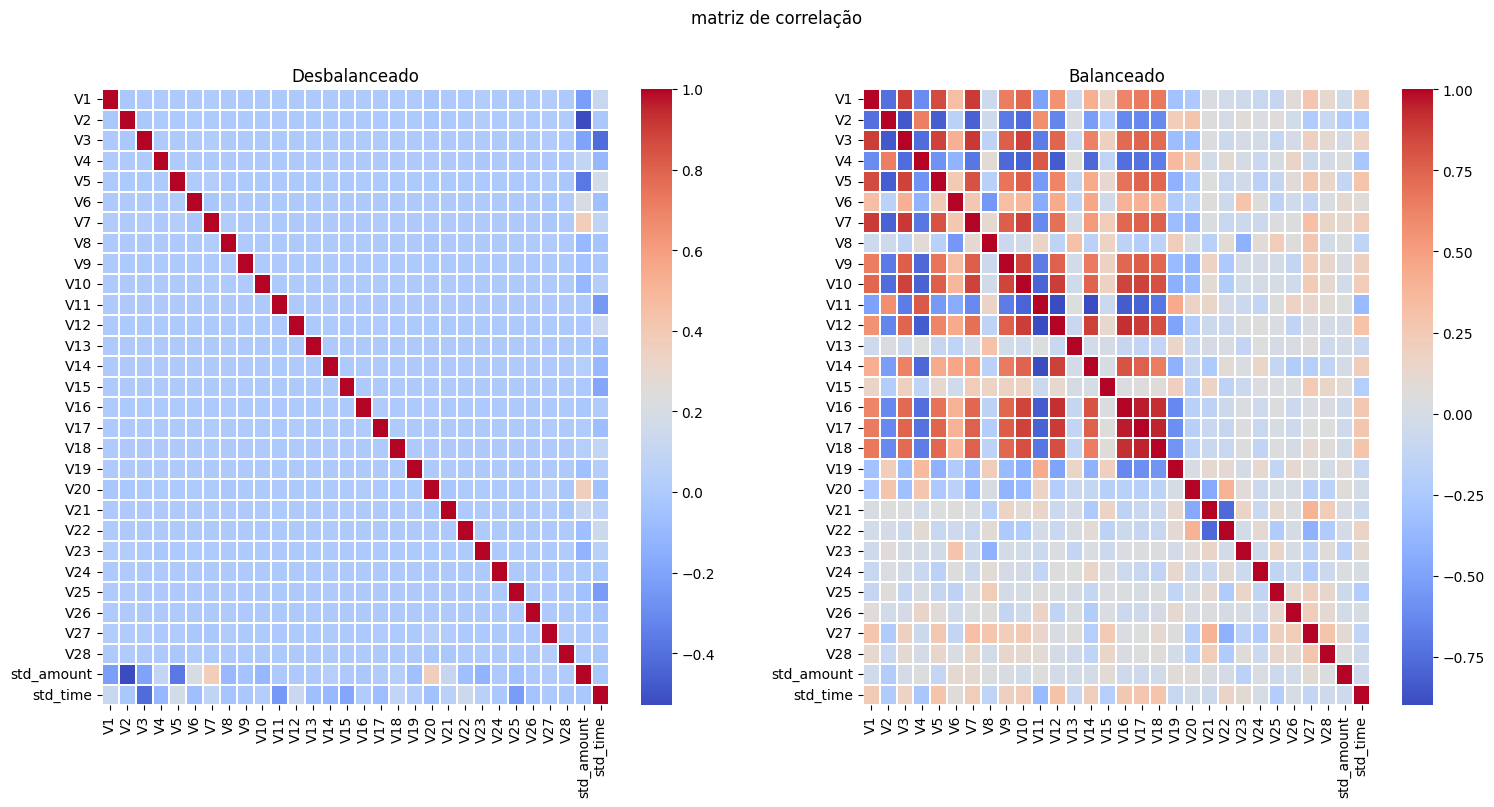

In [26]:
#matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle('matriz de correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidth=.1, cmap='coolwarm',ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidth=.1, cmap='coolwarm',ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Sem saber das dimensões das variáveis e nem do que elas tratam, podemos ver com a matriz de correlação a relação enntre as variáveis em uma escala de cor onde o vermelhor mais forte é a correlação alta e o azul mais escuro é a correlação mais baixa(positiva e negativa respectivamente)

### Machine Learning: Regressão Logistica
Após entender um pouco sobre os dados e fazer uma análise exploratória, utilizaremos o classificador usando a **Regressão Logistica**
* Regressão Logistica : é um algoritmo de aprendizado de máquina usado para problemas de classificação binária.

In [27]:
#instanciar e treinar o modelo de Regressão Logistica
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus,y_rus)

#fazer previsões com os dados de teste
y_pred = model.predict(X_train)
y_proba = model.predict_proba(X_train)

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.

Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada.  você pode ter uma acurácia de 99,88% e detectar menos de 60% das fraudes.

Observe a matriz de confusão para ver a taxa de acertos para transações fraudulentes, ou pela coluna *recall* do Relatório de Classificação.

Uma outra métrica considerada interessante para se avaliar a eficácia é a [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), ou área sob a curva. No caso desse modelo de Regressão Logística, tem-se 96% de AUC.

relatório de classificação
               precision    recall  f1-score   support

           0     0.9999    0.9696    0.9845    181251
           1     0.0494    0.9169    0.0938       313

    accuracy                         0.9695    181564
   macro avg     0.5247    0.9432    0.5392    181564
weighted avg     0.9982    0.9695    0.9829    181564

Acuracia 0.9694708202066489
AUC : 0.9432472272974394


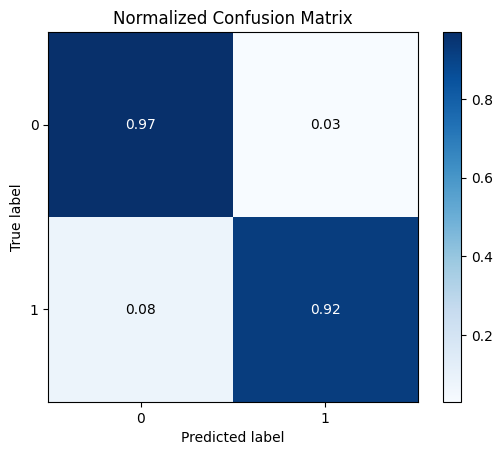

In [28]:
#plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_train, y_pred, normalize=True)

#imprimir relaório de classificação
print('relatório de classificação\n', classification_report(y_train, y_pred, digits=4))

#imprimir a acuracia do modelo
print('Acuracia',accuracy_score(y_train,y_pred))

#imprimir valor da AUC
print('AUC :',roc_auc_score(y_train, y_pred))


### Fazer previsões no conjunto de teste
Precisamos separar os dados em 3 grupos de teste: Treino, validação e teste
<center><img src="https://miro.medium.com/max/1400/1*RJS8yV5mBDqrRu7THooH-w.png" width=400px ></center>

Precisamos também normalizar as colunas *Time* e *Amount*. Interessante observar também que para o aprendizado do algoritmo, precisamos balancear os dados do dataframe. Neste caso, não podemos balancear os dados pois precisamos de todos os registros para fazer as previões nas linhas que ele vier a receber.

**IMPORTANTE** o conjunto de test deve set feito em primeiro lugar para que o algoritmo não tenha contato com estes valores.

In [30]:
#padronizar as colunas Time e Mount - teste
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1,1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1,1))

test_clean.drop(['Time','Amount'], axis=1, inplace=True)

#ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Agora vamos separar em matriz de features e vetor alvo e fazer previões

In [31]:
#separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test_clean['Class']

In [33]:
#fazer as previsoes com os dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Com previões feitas, agora visualizaremos os resultados.

relatório de classificação               precision    recall  f1-score   support

           0     0.9999    0.9710    0.9852     42647
           1     0.0535    0.9459    0.1013        74

    accuracy                         0.9709     42721
   macro avg     0.5267    0.9585    0.5433     42721
weighted avg     0.9983    0.9709    0.9837     42721

Acurácia 0.9709276468247466
AUC:  0.9584584701943485


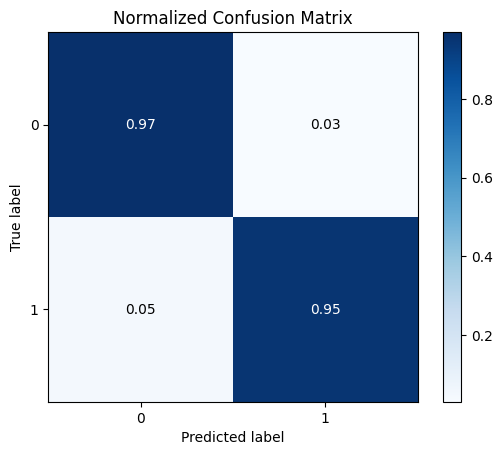

In [34]:
#plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

#imprimir relatório de classificação
print('relatório de classificação', classification_report(y_test, y_pred, digits=4))

#imprimir a acurácia do modelo
print('Acurácia', accuracy_score(y_test, y_pred))

#imprimir o valor da área calculada sob a curva do AUC
print('AUC: ', (roc_auc_score(y_test,y_pred)))

### **Conslusões**
Podemos ver que não se trata de um problema elementar de Regressão Logistica. Apesar dos dados estarem de forma ideal (sem valores ausentes e variáveis categóricas), o desbalanceamento demanda um trabalho considerável junto com a transformação PCA feita, neste caso, nas duas variaveis *Time* e *Amount* já que as demais já haviam sido transformadas.

O resultado alcançado pode ser testado com outros algoritmos para verificar desempenho.

Em alguns casos, As transações fraudulentas foram quase identicas as normais, conforme mostrado no gráfico de densidade das variáveis V13, V22, V25 e v26 e principalmente a V15, podendo ocorrer neste ultimo caso  alguns falsos positivos.

Apesar de não sabermos do que se tratam as variaveés de V1 até V28, podemos ver que muitas delas possuem relação, mas que só pode ser percebido depois de balanceados os dados. este artigo esclarece muito sobre balanceamento de dados https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b .
